## Upload dataset

In [1]:
import pandas as pd 
train=pd.read_csv('../input/nlp-getting-started/train.csv')
test=pd.read_csv('../input/nlp-getting-started/test.csv')
print("the shape of our train set rows {} and columns {}".format(train.shape[0],train.shape[1]))
print("the shape of our test set rows {} and columns {}".format(test.shape[0],test.shape[1]))

the shape of our train set rows 7613 and columns 5
the shape of our test set rows 3263 and columns 4


In [2]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
#We can see an example of text tweet 
train.text[564]

'I liked a @YouTube video http://t.co/9Vw0uQQi1y Marvel VS DC (Avengers Battle!)'

## Exploratory data

Text(0, 0.5, 'Amount')

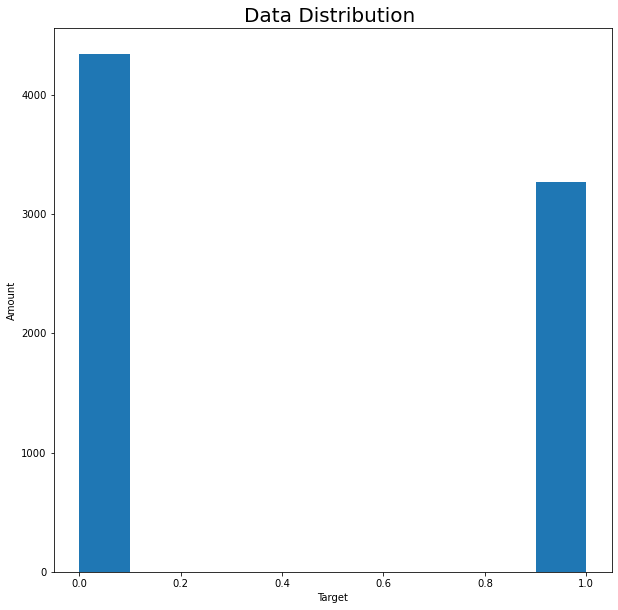

In [5]:
import matplotlib.pyplot as plt
target=train.target
a=target.value_counts()
import matplotlib.pyplot as plt

to_plot = train.target

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot()

ax.hist(to_plot)

ax.set_title("Data Distribution " , fontsize = 20)

ax.set_xlabel("Target")

ax.set_ylabel("Amount")

## See the most words in corpus 

In [6]:
#We create a corpus represent our words intext tweets
corpus=[]
for x in train.text.str.split():
    for i in x:
       corpus.append(i)

## Remove number punctuation...

In [7]:
import re
def  clean_text(df, text_field, new_text_field_name):
    #df[new_text_field_name] = df[text_field].str.lower() #Convert strings in the Series/Index to lowercase.
    #df[new_text_field_name] = df[text_field].apply(lambda x: i.lower() for i in x)
    # remove numbers
    df[new_text_field_name] = df[text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    #remove url
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"https?://\S+|www\.\S+", "", elem))
    #remove HTML tags
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"<.*?>", "", elem))
    #remove emojis 
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", elem))
    return df
data_clean = clean_text(train, 'text', 'text_clean')
data_clean_test = clean_text(test,'text', 'text_clean')
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...


## Remove stopwords

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean_test['text_clean'] = data_clean_test['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds Reason #earthquake May ALLAH Forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked 'shelter place' notified o...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent photo Ruby #Alaska smoke #wildfi...


## Tokenize

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds Reason #earthquake May ALLAH Forgive us,"[Our, Deeds, Reason, #, earthquake, May, ALLAH..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked 'shelter place' notified o...,"[All, residents, asked, 'shelter, place, ', no..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent photo Ruby #Alaska smoke #wildfi...,"[Just, got, sent, photo, Ruby, #, Alaska, smok..."


## Lemmatizing 

In [11]:
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds Reason #earthquake May ALLAH Forgive us,"[Our, Deeds, Reason, #, earthquake, May, ALLAH...","[Our, Deeds, Reason, #, earthquake, May, ALLAH..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask, ., Canada]","[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked 'shelter place' notified o...,"[All, residents, asked, 'shelter, place, ', no...","[All, resident, asked, 'shelter, place, ', not..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,...","[,, people, receive, #, wildfire, evacuation, ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent photo Ruby #Alaska smoke #wildfi...,"[Just, got, sent, photo, Ruby, #, Alaska, smok...","[Just, got, sent, photo, Ruby, #, Alaska, smok..."


## Defining train set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_clean['text_clean'], 
                   
                                                    data_clean['target'], 
                                                    test_size = 0.2,
                                                    random_state = 10)

import numpy as np
#First defining the X (input), and the y (output)
y_train = train['target'].values
X_train = np.array(train["text_lemmatized"])

## Bag of words 

### CountVectorizer 
CountVectorizer converts a collection of text documents to a matrix of token counts: the occurrences of tokens in each document This function produces a sparse representation of the counts (multiple zero in matrix).

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = CountVectorizer( ngram_range=(1, 1)) #ngram_range=(1,1) unigrams
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(),columns=vectorizer.get_feature_names())

,__,__ohhmyjoshh,__scrambledeggs,__srajapakse__,_animaladvocate,_ashj,_asianshawtyy,_bookofdaniel,_charleyisqueen,_dangdaddy,...,ûïyou,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Only alphabet, contains at least 3 letters
vectorizer = CountVectorizer(token_pattern=r'\b[a-zA-Z]{3,}\b')
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(),columns=vectorizer.get_feature_names())

,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aal,aan,aannnnd,aashiqui,aba,abandon,...,zones,zoom,zotar,zouma,zourryart,zrnf,zss,zumiez,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Only alphabet, contains at least 3 letters
vectorizer = CountVectorizer( ngram_range=(2, 2)) #ngram_range=(2, 2) bigrams
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(),columns=vectorizer.get_feature_names())

,__ months,__ want,__ohhmyjoshh stevenrulles,__scrambledeggs calling,__srajapakse__ why,_animaladvocate or,_asianshawtyy sorry,_charleyisqueen yeah,_dangdaddy sirens,_dangerousbeans porridge,...,ûó organizers,ûó richmond,ûó rt,ûó stories,ûó wallybaiter,ûóher upper,ûókody vine,ûónegligence fireworks,ûótech business,ûówe work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Only alphabet, contains at least 3 letters
vectorizer = CountVectorizer( ngram_range=(1,1),min_df = 2) #ngram_range=(1,1) unigrams and the word must shows minimum 2 times min_df = 2 
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(),columns=vectorizer.get_feature_names())

,__,_minimehh,aa,aba,abandon,abandoned,abbott,abbswinston,abc,abcnews,...,ûï,ûïa,ûïhatchet,ûïrichmond,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF_IDF

In [17]:
tfidf = TfidfVectorizer(encoding='utf-8',
                       max_features=5000,
                       norm='l2',
                       sublinear_tf=True)
X_train = tfidf.fit_transform(X_train).toarray()
pd.DataFrame(X_train, columns=tfidf.get_feature_names())

,__,aa,aba,abandoned,abbswinston,abc,abcnews,abe,ability,ablaze,...,ûï,ûïa,ûïhatchet,ûïrichmond,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûó
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dic_vocabulary = tfidf.vocabulary_
dic_vocabulary['happy']


1600

In [19]:
X_test = tfidf.transform(X_test).toarray()
print(X_test.shape)

(1523, 5000)


In [20]:
X_train.shape

(6090, 5000)

## Model naive_bayes


In [21]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

In [22]:
classifier= MultinomialNB()
Classifier= classifier.fit(X_train,Y_train)
Classifier

MultinomialNB()

In [ ]:
Y_pred = classifier.predict(X_test)

## visualize the performance of the model

In [ ]:
training_accuracy  =accuracy_score(Y_train,classifier.predict(X_train))
training_accuracy  

In [ ]:
testing_accuracy =accuracy_score(Y_test,classifier.predict(X_test))
testing_accuracy 

In [ ]:
print(classification_report(Y_test,Y_pred))

In [ ]:
precision_score(Y_test,Y_pred)

In [ ]:
conf_matrix = confusion_matrix(Y_test,Y_pred)
print(conf_matrix)

In [ ]:
import seaborn as sns
import numpy as np
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues')

## model decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

In [ ]:
y_pred = classifier.predict(X_test)

## visualize the performance of the model

In [ ]:
training_accuracy  =accuracy_score(Y_train,classifier.predict(X_train))
training_accuracy 

In [ ]:
testing_accuracy =accuracy_score(Y_test,classifier.predict(X_test))
testing_accuracy

In [ ]:
conf_matrix = confusion_matrix(Y_test,Y_pred)
print(conf_matrix)

## model RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier = classifier.fit(X_train, Y_train)

In [ ]:
y_pred = classifier.predict(X_test)

## visualize the performance of the model

In [ ]:
training_accuracy  =accuracy_score(Y_train,classifier.predict(X_train))
training_accuracy 

In [ ]:
testing_accuracy =accuracy_score(Y_test,classifier.predict(X_test))
testing_accuracy

### naive bayes is the best model, we got a good accuracy.  

## submission

In [ ]:
X_test = tfidf.fit_transform(data_clean_test['text_clean']).toarray()
pd.DataFrame(X_test, columns=tfidf.get_feature_names())

In [ ]:
Y_test_pred = classifier.predict(X_test)
Y_test_pred

In [ ]:
submission_df = pd.DataFrame()
submission_df['id'] = data_clean_test['id']
submission_df['target'] = Y_test_pred
submission_df

In [ ]:
submission = submission_df.to_csv('RESULT.csv',index = False)
